### Make sure you execute each cell as you progress through the notebook by pressing Shift+Enter while the cell is selected

### Start by importing the modules needed for this exercise in the cell below

In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from __future__ import division
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import itertools
import math
import operator

from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 16.410/413 Problem Set 1: Python Warmup

In this first problem set we will learn to use the Jupyer notebook (formerly IPython) that we'll use for some of the psets and we'll remember some useful python concepts.


2. [Problem 1: Implementing a simple function (10 points)](#simple_function)
3. [Problem 2: A brute force approach to the Knapsack Problem (45 points)](#knapsack_problem)
    1. [Compute the total number of combinations (5 points)](#number_total_combinations)
    2. [Find all combinations (15 points)](#all_combinations)
    3. [Find all the valid combinations (5 points)](#valid_combinations)
    4. [Find the best solutions to the knapsack problem (15 points)](#best_solutions)
    5. [Plot the value of the solutions (5 points)](#knapsack_plot)
4. [Problem 3: Approximate pi using Monte Carlo sampling (45 points)](#pi_problem)
    1. [Implement the error function (5 points)](#pi_error)
    2. [Implement the `approximate_pi` function (30 points)](#pi_approximate)
    3. [Print a table of the approximated pi values and the error depending on the number of samples (10 points)](#pi_table)

Total: **100 points**

You'll do three problems in this Problem Set that will help you get used to the Jupyter notebook and Python.

Remember that you can find more information about the Jupyter/IPython notebook in the [course wiki](https://courses.csail.mit.edu/16.410/wiki). Fill in your answers in this notebook below. The notebook will be saved periodically and every time you press Ctrl-s (Command-s in a mac).

The course wiki contains instructions on how to submit the problem sets.

## <a name="simple_function"></a>Problem 1: Implement a simple function

Implement a function that computes the sum of all integer numbers up to n, according to the formula:

\begin{equation}
\sum_{i=0}^n i = \frac{n\cdot(n+1)}{2}
\end{equation}


We'll often use blue boxes like the one below to indicate that you need to write code in the cell below.

<div class="alert alert-info">
Implement the function `sum_to_n(n)` below.
</div>

In [20]:
def sum_to_n(n):
    # MY CODE HERE
    if(n > 0):
        result = n + sum_to_n(n - 1)
        
    else:
        result = 0
    return result
    raise NotImplementedError()

In [21]:
sum_to_n(10)
sum_to_n(5)
sum_to_n(17)

153

Often (but not always) we'll have code cells with test code to check that your code is correct.

Those test cells will look like the following one. If you execute the cell below before completing the code for the `sum_to_n` function, you'll get an error message. However, if your code is correct, you should get a "Test passed" confirmation message in a green box.

Try running the test code below.

In [22]:
"""Test the sum_to_n function"""
from nose.tools import assert_equal
assert_equal(sum_to_n(4), 10)
assert_equal(sum_to_n(10), 55)
test_ok()

Test passed!!

## <a name="knapsack_problem"></a>Problem 2: A brute force approach to the Knapsack problem

The [Knapsack problem](https://en.wikipedia.org/wiki/Knapsack_problem) is a classic combinatorial optimization problem. In this simple exercise we'll ask you to solve the problem using a naïve bruteforce approach (that will only work for small instances). Later in the course, we'll see how this problem can be modeled as an mixed integer linear problem, for example.

The idea is that a thief breaks into a house with a knapsack of a given size and tries to steal as much as he can. He can't put everything into the knapsack, as it has a limited size. The knapsack problem consists on chosing the items to put in the knapsack so that the combined value of all the collected items is maximized, and the size constraint of the knapsack is satisfied.

Imagine the list of items with their sizes and values is the following (9 items):

<table class="table table-condensed table-hover table-striped">
      <thead>
        <tr>
          <th>Item</th>
          <th>Size</th>
          <th>Value</th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <th scope="row">Ring</th>
          <td>1</td>
          <td>15</td>
        </tr>
        <tr>
          <th scope="row">Candelabra</th>
          <td>5</td>
          <td>10</td>
        </tr>
        <tr>
          <th scope="row">Radio</th>
          <td>3</td>
          <td>9</td>
        </tr>
        <tr>
          <th scope="row">Elvis</th>
          <td>4</td>
          <td>5</td>
        </tr>
        <tr>
          <th scope="row">Laptop</th>
          <td>4</td>
          <td>12</td>
        </tr>
        <tr>
          <th scope="row">Xbox</th>
          <td>6</td>
          <td>10</td>
        </tr>
        <tr>
          <th scope="row">Guitar</th>
          <td>7</td>
          <td>9</td>
        </tr>
        <tr>
          <th scope="row">Album</th>
          <td>3</td>
          <td>1</td>
        </tr>
        <tr>
          <th scope="row">Shoes</th>
          <td>3</td>
          <td>2</td>
        </tr>
        
      </tbody>
</table>

Imagine that the size of the knapsack is 15.

The thief could, for example, steal the Guitar and the Shoes for a combined value of $9 + 2$ since the combined size $7 + 3=10$ is smaller than 15, the knapsack size.

Many other combinations are possible.

The Knapsack Problem asks the question of what is the best combination of items to achieve the maximum value.

A naïve way to solve the problem consists on generating all possible combinations of items, filtering the ones that are valid (combined size <= knapsack size) and picking the one(s) with the best value. This is not efficient for large instances, but that's what we'll do today.

Note that to consider all possible combinations, you need to consider all combinations of n=1,2,3...9 elements.
For example, `(Ring), (Xbox, Guitar), (Radio, Shoes, Laptop, Ring)` are three possible combinations (regardless of knapsack size) even though they have 1, 2 and 4 elements. Note that the order doesn't matter:  `(Xbox, Guitar) = (Guitar, Xbox)` for the thief.



### <a name="number_total_combinations"></a>Calculating the number of combinations

Implement the function `num_total_combinations(N)` that calculates the total number of $n=1,2,3...N$ element combinations of N elements.

For example, with three elements `A,B,C`, `num_total_combinations(3)` should return $3 +3+1=7$ as the possible combinations are: `(A), (B), (C), (AB), (AC), (BC), (ABC)`

`num_total_combinations(9)` gives us the total number of combinations that the thief could choose to put in the knapsack (regardless of whether those combinations are feasible due to the size constraint).



<div class="alert alert-warning">
**Hint:** Think that you need to consider all combinations in which an each element is or is not chosen. You could represent which N items are chosen with a binary number of N digits. In the previous example of 3 elements, `(A)` represents a combination in which A is chosen and B and C are not; `(AC)` represents a combination in which A is chosen, B is not chosen and C is chosen. Finally remember that at least one element needs to be chosen (the `()` combination is not valid).
</div>

<div class="alert alert-info">
Implement the function `num_total_combinations(N)` below.
</div>

In [23]:
def num_total_combinations(n):
    import itertools
    lst=[]
    total= 0
    for i in range(1,n+1):
            lst.append(i)
    for j in range(1,n+1):
        length = len(list(itertools.combinations(lst, j)))
        total += length
    return total

In [24]:
print("The number of possible combinations of items is: %d" %num_total_combinations(9))

The number of possible combinations of items is: 511


In [25]:
"""Check that the implementation of num_total_combinations"""
from nose.tools import assert_equal
assert_equal(num_total_combinations(3), 7)
assert_equal(num_total_combinations(2), 3)
assert_equal(num_total_combinations(4), 15)
test_ok()

Test passed!!

### A brute-force approach to solving the Knapsack Problem

In order to solve the knapsack problem, you will:

1. Generate all possible combinations of items that the thief could put in the knapsack (regardless of the size constraint)
2. Keep the valid combinations (those that satisfy the knapsack constraint)
3. Find the 5 best combinations in decreasing value of combined value

We give you the data for the items in the table in the following code cell using Python dictionaries.

In [26]:
# Data from the items table in Python dictionaries
# changes that you make to this cell will be overwritten by our autograding software.
sizes = dict(ring=1, candelabra=5, radio=3, elvis=4, laptop=4, xbox=6, guitar=7, album=3, shoes=3)
values = dict(ring=15, candelabra=10, radio=9, elvis=5, laptop=12, xbox=10, guitar=9, album=1, shoes=2)
items = sizes.keys()

In order to generate all the possible combinations, you can use the `itertools` python module, as illustrated in the follwing example.

Implement the function `make_combinations(items)` that generates a list of all the possible combinations of items that the thief could put in his knapsack (regardless of the size constraint).

Make sure that the list contains as many elements as the total number of possible combinations that you calculated above.

Each combination should be a tuple of strings. As an example `('album', 'ring'), ('album', 'shoes', 'elvis'), ('xbox', 'guitar', 'radio', 'ring')` should be in your list.

<a name="all_combinations"></a>
<div class="alert alert-info">
Implement the function `make_combinations(items)` below.
</div>

In [27]:
def make_combinations(items):
    import pandas as pd
    import itertools as it
    newdata=[]

    for i in range(1,len(items)+1):
        newdata= newdata + list(it.combinations(items,i))
    return newdata


In [28]:
"""Check that all combinations are generated"""
from nose.tools import assert_equal
all_combinations_test = make_combinations(items)
assert_equal(len(all_combinations_test), 511)
test_combinations(all_combinations_test, items)
del all_combinations_test
test_ok()

Test passed!!

Now reject the combinations that don't satisfy the knapsack constraint (the cummulative value of the size of the elements is larger than the knapsack size).

Implement the function `valid_combinations(combinations, sizes, knapsack_size)` that takes all the combinations produced by `make_combinations(items)`, the dictionary of the sizes of each element (`sizes`), and the size of the knapsack and returns a list containing only the valid combinations.

You may want to use Python's `filter` function.

<a name="valid_combinations"></a>
<div class="alert alert-info">
Implement the function `valid_combinations(combinations, sizes, knapsack_size=15)` below.
</div>

In [29]:
def valid_combinations(combinations, sizes, knapsack_size=15):
    # YOUR CODE HERE
    combinations=make_combinations(items)
    listy=[]
    valid_combos=[]

    for i in range(0,len(combinations)):
        listy=list(combinations[i])
        sizescore=0
        for j in range(0, len(listy)):
            sizescore=sizescore+sizes[listy[j]]
        if sizescore<=knapsack_size:
            valid_combos.append(combinations[i])
    return valid_combos
    raise NotImplementedError()

In [30]:
"""Check that all valid combinations are generated"""
from nose.tools import assert_equal
all_valid_test = valid_combinations(make_combinations(items), sizes, 15)
assert_equal(len(all_valid_test), 182)
test_combinations(all_valid_test, items)
test_valid_combinations(all_valid_test, sizes, 15)
del all_valid_test
test_ok()

Test passed!!

Now implement the function `best_knapsack_items(items, sizes, values, knapsack_size, n)` that, given the list of items, the dictionary of their sizes and values, and the size of the knapsack, produces a list of 3-element tuples, whose elements are:

1. The combination
2. The cummulative value of the items in the combination
3. The cummulative size of the items in the combination

The list should have at most size `n` and contain the `n` best combinations (in terms of decreasing cummulative value). If there are less than `n` solutions, the function should return all the solutions ordered.

**Example**:

The following could be valid output of the function (although these 5 are definitely not the best combinations). 

```
[(('album', 'laptop', 'radio', 'elvis'), 27, 14),
 (('album', 'candelabra', 'ring'), 26, 9),
 (('album', 'xbox', 'ring'), 26, 10),
 (('shoes', 'guitar', 'ring'), 26, 11),
 (('shoes', 'radio', 'ring'), 26, 7)]
 ```

<a name="best_solutions"></a>
<div class="alert alert-info">
Implement the function `best_knapsack_items(items, sizes, values, knapsack_size, n)` below.
</div>

In [31]:
def best_knapsack_items(items, sizes, values, knapsack_size=15, n=5):
    # YOUR CODE HERE
    from operator import itemgetter
    combinations=make_combinations(items)
    valid_combos=valid_combinations(combinations, sizes, knapsack_size)
    listy=[]
    valid_combos=[]
    valuescore=[]
    sizeguy=[]
    valuescoreboard=[]
    output=[]
    placeholder=[]
    tracker=[]
    scorekeeper=0
    answer=[]
    sizescore=0
    final=[]
    lister=[]
    listy=list(combinations)
    for i in range(0,len(combinations)):
        listy=list(combinations[i])
        sizescore=0
        for j in range(0, len(listy)):
            sizescore=sizescore+sizes[listy[j]]
        if sizescore<=knapsack_size:
            valid_combos.append(combinations[i])
            sizeguy.append(sizescore)
    for k in range(0,len(valid_combos)):
        valuescore=0
        listy2=list(valid_combos[k])
        for l in range(0, len(listy2)):
            valuescore=valuescore+values[listy2[l]]
        valuescoreboard.append(valuescore)
        
    for w in range(0, len(valid_combos)):
        lister=[valid_combos[w],valuescoreboard[w],sizeguy[w]]
        output.append(lister)
        
    ref=sorted(output, key=itemgetter(1),reverse=True)
    if len(output)>=n:
        for z in range(0,n):
            final.append(ref[z])
    else:
        final=ref
    if final is None:
        return print("final is none")
    else:
        return final
    raise NotImplementedError()
    

In [32]:
best_knapsack_items(items, sizes, values, knapsack_size=15, n=5)

[[('ring', 'candelabra', 'radio', 'laptop'), 46, 13],
 [('ring', 'radio', 'laptop', 'xbox'), 46, 14],
 [('ring', 'radio', 'laptop', 'guitar'), 45, 15],
 [('ring', 'candelabra', 'radio', 'xbox'), 44, 15],
 [('ring', 'radio', 'elvis', 'laptop', 'shoes'), 43, 15]]

In [33]:
# Let's find out what the best solutions are!
# (this cell will be overwritten)
for c, v, s in best_knapsack_items(items,sizes,values, knapsack_size=15, n=5):
    print("value: %d, size: %d, combination: %r" % (v, s, c,))

value: 46, size: 13, combination: ('ring', 'candelabra', 'radio', 'laptop')
value: 46, size: 14, combination: ('ring', 'radio', 'laptop', 'xbox')
value: 45, size: 15, combination: ('ring', 'radio', 'laptop', 'guitar')
value: 44, size: 15, combination: ('ring', 'candelabra', 'radio', 'xbox')
value: 43, size: 15, combination: ('ring', 'radio', 'elvis', 'laptop', 'shoes')


### Plot the best knapsack value vs knapsack size using matplotlib

In the final part of this exercise, you will make a plot the best knapsack value vs the knapsack size.

Implement the function `best_value_plot(knapsack_capacities)` that, given a list of knapsack capacities (such as `range(2,40)`, produces a plot of the knapsack capacity vs the best possible knapsack value.

You'll probably want to use the `best_knapsack_items` function you defined earlier and the matplotlib plotting commands showed at the beginning of this document.

<a name="knapsack_plot"></a>
<div class="alert alert-info">
Implement the function `best_value_plot(knapsack_capacities)` below.
</div>

In [34]:
def best_value_plot(knapsack_capacities):
    # YOUR CODE HERE
    import matplotlib.pyplot as plt
    score2=[]
    final2=[]
    knapsackkeeper=[]
    for p in knapsack_capacities:
        knapsack_size=p
        final2=best_knapsack_items(items,sizes,values, knapsack_size=p, n=1)
        placer=list(final2[0])
        score2.append(placer[1])
        knapsackkeeper.append(p)
    plt.scatter(knapsackkeeper,score2)
    plt.ylabel('Knapsack Value')
    plt.xlabel('Knapsack Size')
    return plt.show()
    raise NotImplementedError()

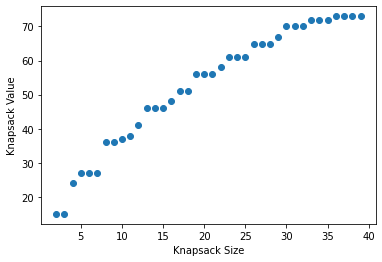

In [37]:
# Let's plot the best value for knapsack sizes between 2 and 40
# (this cell will be overwritten)
best_value_plot(range(2,40))

## <a name="pi_problem"></a>Problem 3: Approximate pi using Monte Carlo sampling

In this exercise you will use a Monte Carlo sampling technique to approximate the value of $\pi$, as shown in the following image.

<img src="pi_example.png"/>


The idea is fairly simple. The ratio of the area of a circle and the square around it is the following:

\begin{equation}
ratio = \frac{A_{circle}}{A_{square}} = \frac{\pi R^2}{4 R^2} = \frac{\pi}{4}
\end{equation}

Therefore, we can calculate $\pi$ as:

\begin{equation}
\pi = 4 \frac{A_{circle}}{A_{square}}
\end{equation}

Now you may wonder how you can calculate the area of the circle without using $\pi$. That's where Monte Carlo sampling kicks in. We'll sample $N$ $(x,y)$ points from the uniform distribution of $[-1,1] \times [-1,1]$. Then we'll approximate the ratio of the area of the circle to the area of the rectangle by the number of points that fall in the circle compared to the number of total sampled points.

\begin{equation}
\pi \approx 4 \frac{N_{\text{in circle}}}{N}
\end{equation}


Remember that the points that fall inside the circle of center $(0,0)$ and radius R are those for which

\begin{equation}
    x ^ 2 + y ^2 \leq R^2
\end{equation}

holds.


The code example below shows how to take N samples from the $[-1,1] \times [-1,1]$ uniform distribution.

You'll probably want to use this in your code.

(-1.0971519210218523,
 1.09471070893415,
 -1.0894102111524762,
 1.0975862723108298)

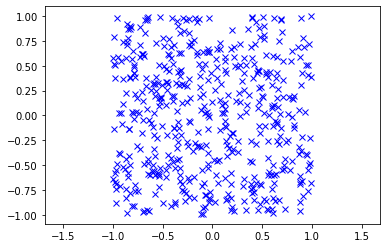

In [38]:
# Example that shows how to sample from the [-1,1] x [-1,1] uniform distribution
Nsamples = 500
R=1
samples = np.random.uniform(-R,R,[Nsamples,2])
# samples is a Nsamples x 2 numpy array
# the x values are given by samples[:,0] (the first column)
# the y values are given by samples[:,1] (the second column)

# We can plot these sample values with matplotlib
plt.plot(samples[:,0],samples[:,1],'xb')
plot_limits = [-1.25*R, 1.25*R]
plt.xlim(plot_limits)
plt.ylim(plot_limits)
plt.axis('equal') # to make x and y axes equal


Implement the function `pi_error(pi_approx)` that calculates the error of your pi approximation according to the following formula:

\begin{equation}
    error = \frac{|\pi_{approx} - \pi|}{\pi}
\end{equation}

<a name="pi_error"></a>
<div class="alert alert-info">
Implement the function `pi_error(pi_approx)` in the cell below.
</div>

In [39]:
def pi_error(pi_approx):
    import math
    error=abs(pi_approx-math.pi)/math.pi
    return error
    raise NotImplementedError()  


In [40]:
"""Test the pi_error function"""
from nose.tools import assert_equal, ok_, assert_almost_equal
assert_almost_equal(pi_error(3.1), 0.013239, places=5)
assert_almost_equal(pi_error(3.0), 0.0450703, places=5)
assert_almost_equal(pi_error(2), 0.3633802, places=5)
assert_almost_equal(pi_error(4), 0.2732395, places=5)
test_ok()

Test passed!!

Now implement the function `approximate_pi(N)` that returns an approximation to $\pi$ according to the method explained above.

The input to the function is N, the number of samples used to perform the approximation.

Remember that what you have to do is:

1. Take N samples in the $[-1,1] \times [-1,1]$ uniform distribution
2. Count how many of those samples fall inside the circle of center $(0,0)$ and radius 1.
3. Calculate $\pi_{approx}$ using the formula described above

You can plot the sampled points using matplotlib (like the graph displayed at the beginning of this exercise), but this is optional and not required.


<a name="pi_approximate"></a>
<div class="alert alert-info">
Implement the function `approximate_pi(N)` in the cell below.
</div>

In [41]:
def approximate_pi(N):
    """Return an approximation of the value of pi using N samples and the procedure described above."""
    # YOUR CODE HERE
    Nsamples = N
    R=1
    samples = np.random.uniform(-R,R,[Nsamples,2])
    import math
    pivar=0
    counterincircle=0
    error=0
    for i in range(0,len(samples)):
        square1= samples[i][0]
        square2= samples[i][1]
        if square1*square1+square2*square2<=R:
            counterincircle=counterincircle+1
    pivar=4*(counterincircle/Nsamples)
    
    return pivar
    raise NotImplementedError()


)Now let's see how the number of samples affects the quality of the approximation of $\pi$.

Implement the function `print_approx_pi_table` that computes the mean $\pi$ approximation with 100, 1000, 10000 and 50000 samples. For each number of samples $N$ the function should compute the $\pi$ approximation $n=10$ times and average the $\pi_{approx}$ and error.

The function, that takes no arguments, should print a table with one row for each value of the number of samples containing:

- The number of samples used
- The average approximated value of pi computed, $\pi_{approx}$
- The average error of that approximation using the `pi_error` function you implemented earlier

For example, my `print_approx_pi_table` prints the following table:

```
N samples:   100, mean pi_approx: 3.16000, mean pi error: 3.428 %, std error: 0.026
N samples:  1000, mean pi_approx: 3.15400, mean pi error: 1.617 %, std error: 0.013
N samples: 10000, mean pi_approx: 3.12824, mean pi error: 0.639 %, std error: 0.004
N samples: 50000, mean pi_approx: 3.14361, mean pi error: 0.156 %, std error: 0.002
```

NOTE: You don't need to compute the standard deviation of the error.

<div class="alert alert-warning">
If your function `approximate_pi(N)` plots something, I recommend that you comment that out before running the `print_approx_pi_table()`, as otherwise it will generate a lot of graphics and become very slow.
</div>

<a name="pi_table"></a>
<div class="alert alert-info">
Implement the function `print_approx_pi_table()` in the cell below.
</div>

In [42]:
def print_approx_pi_table():
    """Print a table comparing the approximated values of pi for different values of the number of samples"""
    import math 
    samplevalues=[100,1000,10000,50000]
    avgmat=[]
    valueguy=0
    varibale=[]
    for i in range(0, len(samplevalues)):
        N=samplevalues[i]
        output=0
        for j in range(1, 11):
            valueguy=approximate_pi(N)
            output=output+valueguy
        avgmat.append(output/10)
        varibale.append(100*(abs(1-(output/10)/math.pi)))
    a_variable=round(avgmat[0],3)
    b_variable=round(varibale[0],3)
    c_variable=round(avgmat[1],3)
    d_variable=round(varibale[1],3)
    e_variable=round(avgmat[2],3)
    f_variable=round(varibale[2],3)
    g_variable=round(avgmat[3],3)
    h_variable=round(varibale[3],3)
    part1= 'N samples:'
    part2= ', mean pi_approx:'
    part3=', mean pi error:'
    part4='%.'
    line1=[]
    line2=[]
    line3=[]
    line4=[]
    line1=(f"N samples:  100,  mean pi_approx: {a_variable},  mean pi error: {b_variable}%")
    line2=(f"N samples: 1000,  mean pi_approx: {c_variable},  mean pi error: {d_variable}%")

    line3=(f"N samples:10000,  mean pi_approx: {e_variable},  mean pi error: {f_variable}%")
    line4=(f"N samples:50000,  mean pi_approx: {g_variable},  mean pi error: {h_variable}%")
    return print(line1, line2, line3, line4, sep="\n")
    
    
    raise NotImplementedError()

In [43]:
# Let's see what your table looks like
# (this cell will be overwritten)
print_approx_pi_table()

N samples:  100,  mean pi_approx: 3.168,  mean pi error: 0.841%
N samples: 1000,  mean pi_approx: 3.15,  mean pi error: 0.255%
N samples:10000,  mean pi_approx: 3.137,  mean pi error: 0.146%
N samples:50000,  mean pi_approx: 3.141,  mean pi error: 0.031%
